# Análise exploratória de dados

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Descrição dos dados

"Diamonds" é um dataset retirado do Kaggle com preços e atributos de mais de 54.000 diamantes. Ele possui 53.940 linhas e dez variáveis, que são:

**price**: O preço do diamante em dólares americanos (\$326 - $18823)

**carat**: O peso do diamante em quilates (0.2 - 5.01)

**cut**: A qualidade do corte do diamante (Fair, Good, Very Good, Premium, Ideal)

**color**: Cor do diamante, de J (pior) à D (melhor)

**clarity**: O quão claro é o diamante (do pior para o melhor, I1-SI2-SI1-VS2-VS1-VVS2-VVS1-IF)

**x**: Comprimento em milímetros (0 - 10.74)

**y**: Largura em milímetros (0 - 58.9)

**z**: Profundidade em milímetros (0 - 31.8)

**depth**: A porcentagem total de profundidade do diamante, calculada através da fórmula:
    $\LARGE \frac{z}{\bar{x}(x, y)} = \frac{2 \times z}{(x+y) (43-79)}$
    
**table**: A largura do topo do diamante relativa ao seu ponto mais largo (43 - 95)

In [2]:
# Ler o dataframe, exibir primeiras dez linhas, remover coluna de índice
df = pd.read_csv('../data/raw/diamonds.csv', index_col=[0])

df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


---
Sobre os dados no dataframe:

In [3]:
# Exibir informações sobre as variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


---
Resumo estatístico do dataframe:

In [4]:
# Descrição estatística do dataframe
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Os valores de X, Y e Z na coluna "min" chegam à zero. Isso significa que existem diamantes no dataset que estão com determinadas dimensões zeradas - neste caso, não nos é interessante usá-los na análise e vamos removê-los.

---

In [5]:
# Remoção de diamantes com dimensões faltantes
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)

# Verifica o novo tamanho do set
df.shape

(53920, 10)

Saímos de 53.940 entradas para 53.920 entradas, totalizando uma perda de 20 pontos ao remover os diamantes com dimensões faltantes.

---
Dicionário de dados

In [6]:
dictionary_path = '../data/external/diamond_dictionary.csv'

df_diamond_dict = pd.read_csv(dictionary_path)

# Exibe dicionário
df_diamond_dict

,variable,description,type,subtype
0,price,valor em dólares americanos (USD),quantitativa,discreta
1,carat,peso do diamante em quilates,quantitativa,discreta
2,cut,"qualidade do corte (fair, good, very good, pre...",qualitativa,ordinal
3,color,"cor do diamante, de D (melhor) a J (pior)",qualitativa,ordinal
4,clarity,o quão claro (translúcido) é o diamante (I1 (p...,qualitativa,ordinal
5,x,comprimento em milímetros (0 - 10.74),quantitativa,contínua
6,y,largura em milímetros (0 - 58.9),quantitativa,contínua
7,z,profundidade em milímetros (0 - 31.8),quantitativa,contínua
8,depth,porcentagem de profundidade total (z / mean (x...,quantitativa,discreta
9,table,largura do topo do diamante relativo ao seu po...,quantitativa,contínua


## 2. Perguntas de partida e hipóteses

Antes de iniciarmos, algumas formatações visuais pros gráficos a ser plotados:

In [7]:
# Formatando gráfico
sns.set_style('whitegrid')

#### 1. O peso dos diamantes é relativo ao seu preço?
Diamantes mais pesados são mais caros que diamantes mais leves?

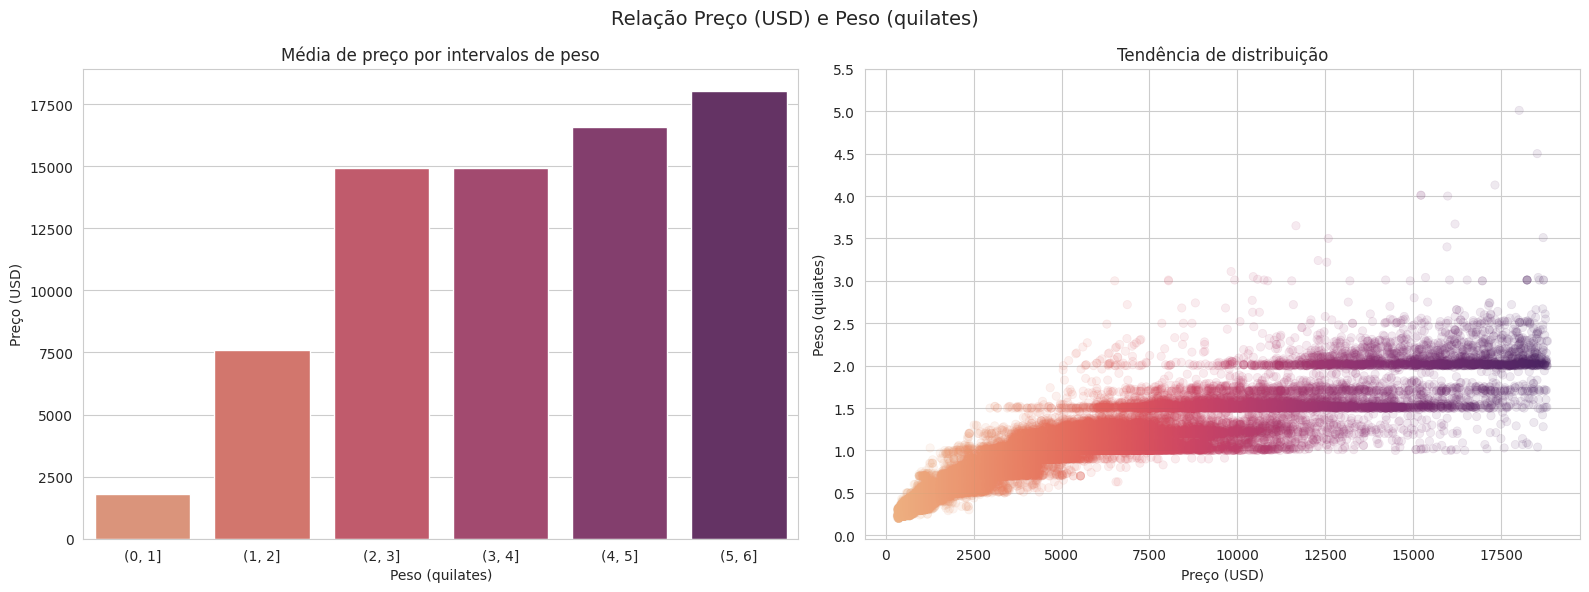

In [8]:
# Originalmente, eu pensei em exibir um scatterplot. A ideia parecia boa, mas a exibição ficou confusa. Eu vou deixar ele pra fins de estudo,
# mas minha abordagem vai ser um gráfico de barras divivido em bins pra cada unidade de quilate arredondada pra cima (.1 -> 1)

# Dividindo o plot em dois gráficos. Um pro scatter antigo e o outro pro gráfico de barra.
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Relação Preço (USD) e Peso (quilates)', fontsize = 14)

# Criação do scatterplot comparativo (preço x peso)
sns.scatterplot(data = df, x = 'price', y = 'carat', ax = axes[1],
                hue = 'price', palette = 'flare', alpha = 0.1, edgecolor = None,
               legend = False)
axes[1].set_yticks(np.arange(0, 6, step = 0.5))
axes[1].set_title('Tendência de distribuição')
axes[1].set_xlabel('Preço (USD)')
axes[1].set_ylabel('Peso (quilates)')

# Agora pro gráfico de barra:
# Cria bins pra cada unidade de quilate.
df['weight_bin'] = pd.cut(df['carat'], bins=[0, 1, 2, 3, 4, 5, 6])

# Calcula a média pra cada uma das bins
price_weight_avg = df.groupby('weight_bin', observed = False)['price'].mean().reset_index()

# Exibe um gráfico de barras comparativo (preço x peso)
sns.barplot(x = 'weight_bin', y = 'price', data = price_weight_avg, ax = axes[0],
            hue = 'weight_bin', palette = 'flare', legend = False)
axes[0].set_title('Média de preço por intervalos de peso')
axes[0].set_ylabel('Preço (USD)')
axes[0].set_xlabel('Peso (quilates)')

# Pra deixar o gráfico mais "apertado"
plt.tight_layout()
plt.show()

Analisando os gráficos acima, é possível notar uma tendência que os diamantes possuem de ter um valor mais elevado conforme seu peso. Diamantes com menor peso (esquerda do gráfico) tendem a possuir uma média de preço inferior a 2300 USD, enquanto diamantes de maior peso (direita do gráfico) possuem uma média de preço muito superior (acima de 15000 USD).

#### 2. Como a clareza dos diamantes interfere em seus preços?
Existe alguma relação entre o quão claro é um diamante e seu valor de mercado?

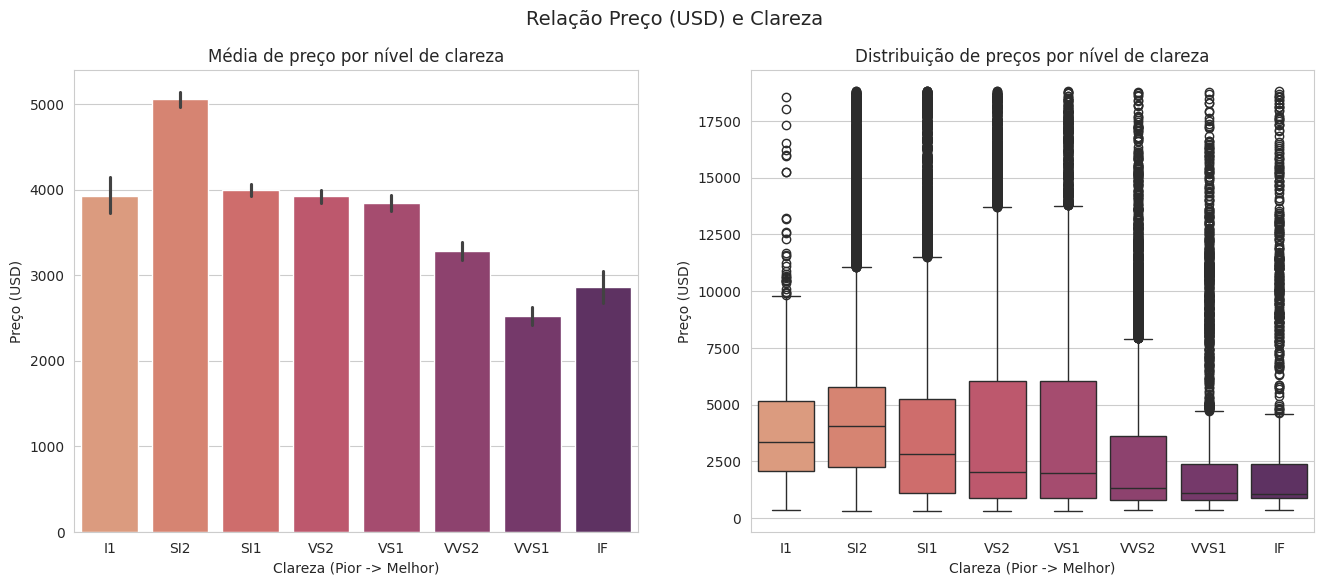

In [9]:
# Aqui, eu decidi usar dois gráficos também: um gráfico de barras para exibir a média de preço,
# e um gráfico de caixas para mostrar a variação de preço por nível de clareza.

# Cria uma grid para os dois gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Relação Preço (USD) e Clareza', fontsize = 14)

# Organiza o índice de clareza na ordem de pior para melhor
clarity_index = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Ordena a variável clarity de forma crescente
df['clarity'] = pd.Categorical(df['clarity'], categories = clarity_index, ordered = True)

# Exibe um gráfico de barras para a média de preço por tipo de clareza
sns.barplot(x = 'clarity', y = 'price', data = df, ax = axes[0],
            hue = 'clarity', palette = 'flare', legend = False,
            order = clarity_index)
axes[0].set_title('Média de preço por nível de clareza')
axes[0].set_ylabel('Preço (USD)')
axes[0].set_xlabel('Clareza (Pior -> Melhor)')

# Exibe um gráfico de caixas para indicar a distribuição de preços por tipo de clareza
sns.boxplot(x = 'clarity', y = 'price', data = df, ax = axes[1],
            hue = 'clarity', palette = 'flare', legend = False,
            order = clarity_index)
axes[1].set_title('Distribuição de preços por nível de clareza')
axes[1].set_ylabel('Preço (USD)')
axes[1].set_xlabel('Clareza (Pior -> Melhor)')

plt.show()

Nos gráficos acima, ocorre um fenômeno intrigante: por alguma razão desconhecida, diamantes de clareza maior parecem ter uma média de preço menor que os diamantes de clareza menor, que são os mais caros. Como esse comportamento não parece de acordo com o esperado, eu decidi verificar quantas amostras estão presentes em cada nível de clareza, tal como o peso médio de cada uma delas, de forma a inferir se o peso e a quantia de amostras pode ter influenciado no preço médio por clareza.

In [10]:
# Pra fazer a contagem, eu vou criar uma pequena tabela com o pandas pra exibir, exatamente,
# quantas amostras estão presentes em cada nível de clareza.

# Cria uma pequena tabela no pandas, contando o numero de valores em cada valor da variável clareza
clarity_summary = df.groupby('clarity', observed = False).agg(
                             count = ('price', 'size'),
                             min_price = ('price', 'min'),
                             max_price = ('price', 'max')
                            ).reset_index()
clarity_summary.columns = ['Clareza', 'Número de amostras', 'Menor valor (USD)', 'Maior valor (USD)']

# Exibe a tabela
clarity_summary

,Clareza,Número de amostras,Menor valor (USD),Maior valor (USD)
0,I1,738,345,18531
1,SI2,9185,326,18804
2,SI1,13063,326,18818
3,VS2,12254,334,18823
4,VS1,8170,327,18795
5,VVS2,5066,336,18768
6,VVS1,3654,336,18777
7,IF,1790,369,18806


Primeira informação que se pode extrair dessa tabela é que os valores dos diamantes de todas as clarezas variam bastante. Tanto as menores clarezas quanto as maiores clarezas possuem diamantes com preços baixos (326 - 369 USD) e preços altos (18531 - 18823 USD), independente da clareza. Isso pode inferir que **as clarezas não têm tanta influência no preço quanto outros aspectos**.

Um último teste a se fazer é verificar o quilate médio dos diamantes em cada um dos grupos de nível de clareza - dessa forma, podemos fazer uma triangulação e descobrir se, no fim das contas, o preço médio por clareza foi influenciado 

In [11]:
# Cria uma tabela Pandas para identificar o peso médio, em quilates, de cada categoria de clareza
avg_weight_by_clarity = df.groupby('clarity', observed = False)['carat'].mean().round(2).reset_index()
avg_weight_by_clarity.columns = ['Clareza', 'Peso médio (quilates)']

# Exibe a tabela, de novo
avg_weight_by_clarity

,Clareza,Peso médio (quilates)
0,I1,1.28
1,SI2,1.08
2,SI1,0.85
3,VS2,0.76
4,VS1,0.73
5,VVS2,0.60
6,VVS1,0.50
7,IF,0.51


A tabela acima descreve o peso médio (em quilates) dos diamantes em cada grupo de clareza, indicando que, de fato, **diamantes com menos clareza na amostra são mais pesados**. Isso não significa que este é um fenômeno natural ou não, mas garante que, neste conjunto de dados, os diamantes com menor clareza são, também, os mais pesados. Isso interfere diretamente no preço médio dos grupos de clareza, corroborando que a clareza, sozinha, não possui tanto peso na precificação de um diamante.

Abaixo, gráficos que mostram as mesmas informações acima, mas de forma mais visual:

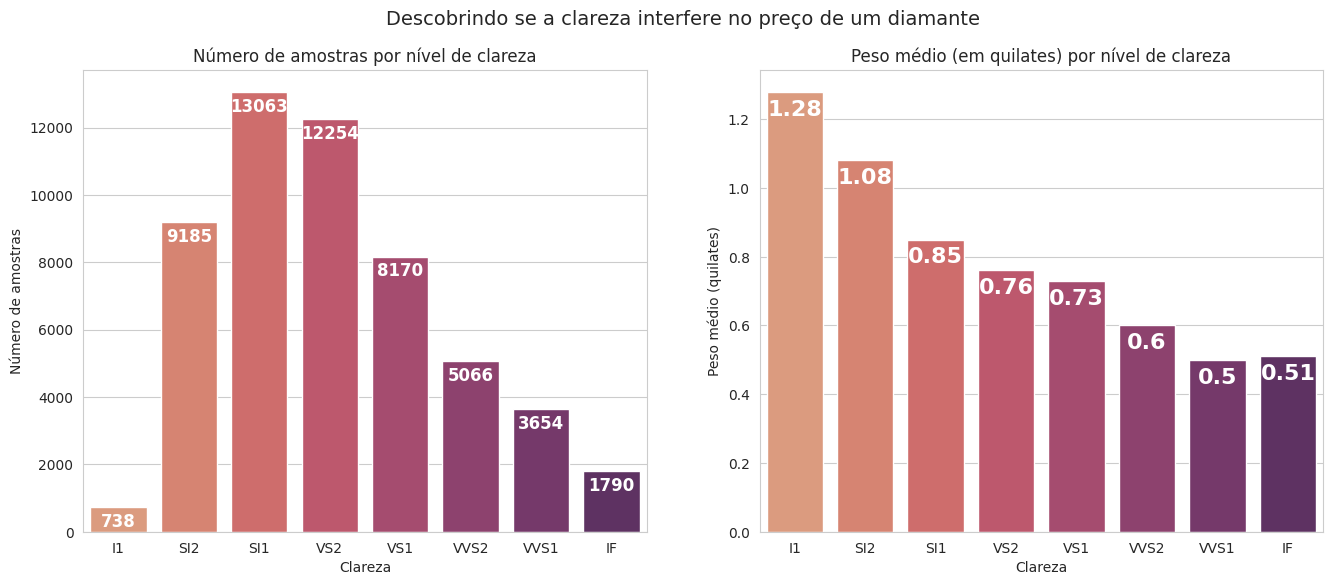

In [12]:
# Demonstração gráfica da informação nas tabelas acima:

# Montagem de uma grid com duas tabelas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Descobrindo se a clareza interfere no preço de um diamante', fontsize = 14)

# Exibe um gráfico que mostra a quantia de amostras em níveis de clareza específicos
sns.barplot(data = clarity_summary, x = 'Clareza', y = 'Número de amostras', ax = axes[0],
            hue = 'Clareza', palette = 'flare', order = clarity_index)

# Cria texto em cada uma das barras com o valor exato de amostras
for index, row in clarity_summary.iterrows():
    axes[0].text(index, row['Número de amostras'] - 700, # posicionando dentro da barra
    row['Número de amostras'],
    color = 'white', ha = 'center', va = 'bottom',
    fontsize = 12, fontweight = 'bold')
axes[0].set_title('Número de amostras por nível de clareza')

# Exibe um gráfico que mostra o peso médio (em quilates) por níveis de clareza específicos
sns.barplot(data = avg_weight_by_clarity, x = 'Clareza', y = 'Peso médio (quilates)', ax = axes[1],
            hue = 'Clareza', palette = 'flare', order = clarity_index)

# Cria texto em cada uma das barras com o peso médio
for index, row in avg_weight_by_clarity.iterrows():
    axes[1].text(index, row['Peso médio (quilates)'] - 0.08, # posicionando dentro da barra
    row['Peso médio (quilates)'],
    color = 'white', ha = 'center', va = 'bottom',
    fontsize = 16, fontweight = 'bold')
axes[1].set_title('Peso médio (em quilates) por nível de clareza')

plt.show()

Podemos, por fim, inferir que, de fato, a clareza tem pouco efeito sobre o preço de um diamante e as alterações de preço no primeiro gráfico são devidas ao peso em cada uma das amostras. Mas, mesmo "pouco", qual é esse efeito?

Por fim, uma última comparação: qual é o preço médio do maior grupo de peso descrito entre os diamantes sob a variável de clarezas específicas?

In [13]:
# Pra começar, precisamos descobrir qual peso de diamante tem mais amostras.
# Pra esse fim, uma breve tabela com o numero de ocorrências pra cada peso de diamante há de servir.
# Como os diamantes possuem pesos distintos, vamos arredondar todos para unidades de quilate com uma bin
# criada anteriormente.

clarity_summary = df.groupby('weight_bin', observed = False).agg(
                             count = ('price', 'size')
                            ).reset_index()
clarity_summary.columns = ['Quilates', 'Número de amostras']

# Exibe a tabela
clarity_summary

,Quilates,Número de amostras
0,"(0, 1]",36434
1,"(1, 2]",15603
2,"(2, 3]",1851
3,"(3, 4]",27
4,"(4, 5]",4
5,"(5, 6]",1


Existe um maior número de amostras entre 0 e 1 quilates do que qualquer outro grupo de peso. Vamos usar, portanto, essa bin como grupo de comparação:

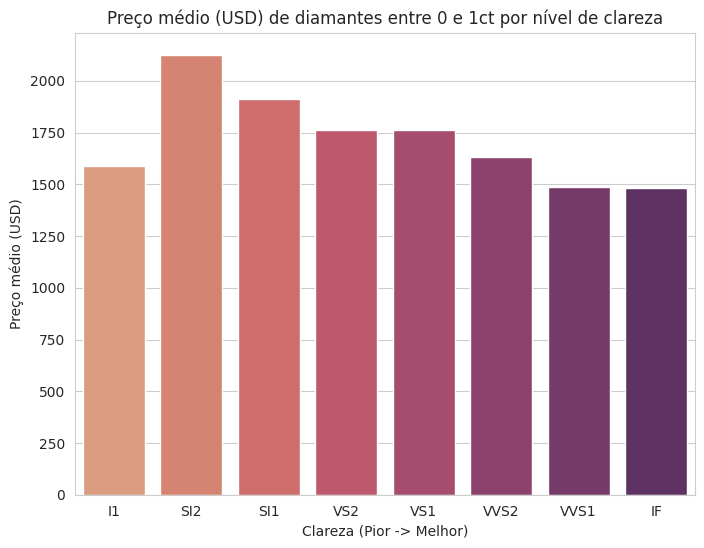

In [14]:
# Primeiro, a gente cria uma variável que guarda só os diamantes entre 0 e 1 quilates.
diamonds_first_bin = df[df['weight_bin'] == pd.Interval(0, 1, closed = 'right')]

# Agora a gente calcula o preço médio pra cada nível de clareza dentro desse filtro:
avg_price_by_clarity_bin1 = diamonds_first_bin.groupby('clarity', observed = False)['price'].mean().reset_index()

# Agora cria o gráfico que mostra a nossa comparação:
plt.figure(figsize = (8, 6))
sns.barplot(data = avg_price_by_clarity_bin1, x = 'clarity', y = 'price',
            hue = 'clarity', palette = 'flare', order = clarity_index)
plt.title('Preço médio (USD) de diamantes entre 0 e 1ct por nível de clareza')
plt.xlabel('Clareza (Pior -> Melhor)')
plt.ylabel('Preço médio (USD)')

plt.show()

Nessa última comparação, é notável que os diamantes de peso similar com menor nível de clareza são os que possuem menor valor; entretanto, os diamantes de demais clarezas possuem preços muito similares. Isso pode indicar uma desvalorização leve dos diamantes com pior clareza - mas só seria possível afirmar isso triangulando com outros fatores, tais como corte e cor.

#### 3. O quanto a cor do diamante interfere no seu valor?
A diferença de preço de um diamante de melhor cor (D) e de um diamante de pior cor (J) é muito grande?

Essencialmente, essa dúvida é igual à anterior - logo, seria lógico partir do mesmo ponto de início e criar gráficos iguais aos primeiros gráficos da pergunta anterior. Mas, antes de fazer isso, dessa vez, eu quero fazer o processo inverso: quero contar quantos diamantes de cada cor estão presentes no conjunto e entender, também, qual o peso médio deles. Além disso, diferente do nível de clareza, a ordem das cores não é descrita pelo dicionário (exceto pela melhor, D, e pior, J), então essa breve exploração também vai servir como identificação.

Dado que o peso de um diamante tem uma clara e forte influência no seu preço, a partir de agora, esse vai ser o ponto de partida dentre as presunções da análise.

In [15]:
# Aqui eu vou criar uma tabela simples com o pandas para contar o número de amostras
# em cada categoria de cor ao mesmo tempo que descubro quais categorias estão disponíveis.

# Cria uma pequena tabela no pandas, contando o numero de valores em cada valor da variável cor
color_summary = df.groupby('color', observed = False).agg(
                             count = ('price', 'size'),
                             min_price = ('price', 'min'),
                             max_price = ('price', 'max')
                            ).reset_index()
color_summary.columns = ['Cor', 'Amostras', 'Menor valor (USD)', 'Maior valor (USD)']

# Exibe a tabela
color_summary

,Cor,Amostras,Menor valor (USD),Maior valor (USD)
0,D,6774,357,18693
1,E,9797,326,18731
2,F,9538,342,18791
3,G,11284,354,18818
4,H,8298,337,18803
5,I,5421,334,18823
6,J,2808,335,18710


In [16]:
# Sabendo dos valores, agora organizamos a ordem de cores da pior cor (J) para a melhor cor (J).
color_index = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

# Ordena categoricamente a variável de forma crescente
df['color'] = pd.Categorical(df['color'], categories = color_index, ordered = True)

Aparentemente, a cor de um diamante vai de D (melhor) à J (pior) em ordem alfabética. Pelos valores na tabela, é possível deduzir que este é um caso similar ao da clareza - onde, independente da cor, os menores e os maiores valores são mais atrelados ao peso do que à cor.

De qualquer forma, prossigamos com uma tabela comparativa para identificar o peso médio de cada um dos conjuntos de cores:

In [17]:
# Cria uma tabela Pandas para identificar o peso médio, em quilates, de cada grupo de cor
avg_weight_by_color = df.groupby('color', observed = False)['carat'].mean().round(2).reset_index()
avg_weight_by_color.columns = ['Cor', 'Peso médio (quilates)']

# Exibe a tabela, mais uma vez
avg_weight_by_color

,Cor,Peso médio (quilates)
0,J,1.16
1,I,1.03
2,H,0.91
3,G,0.77
4,F,0.74
5,E,0.66
6,D,0.66


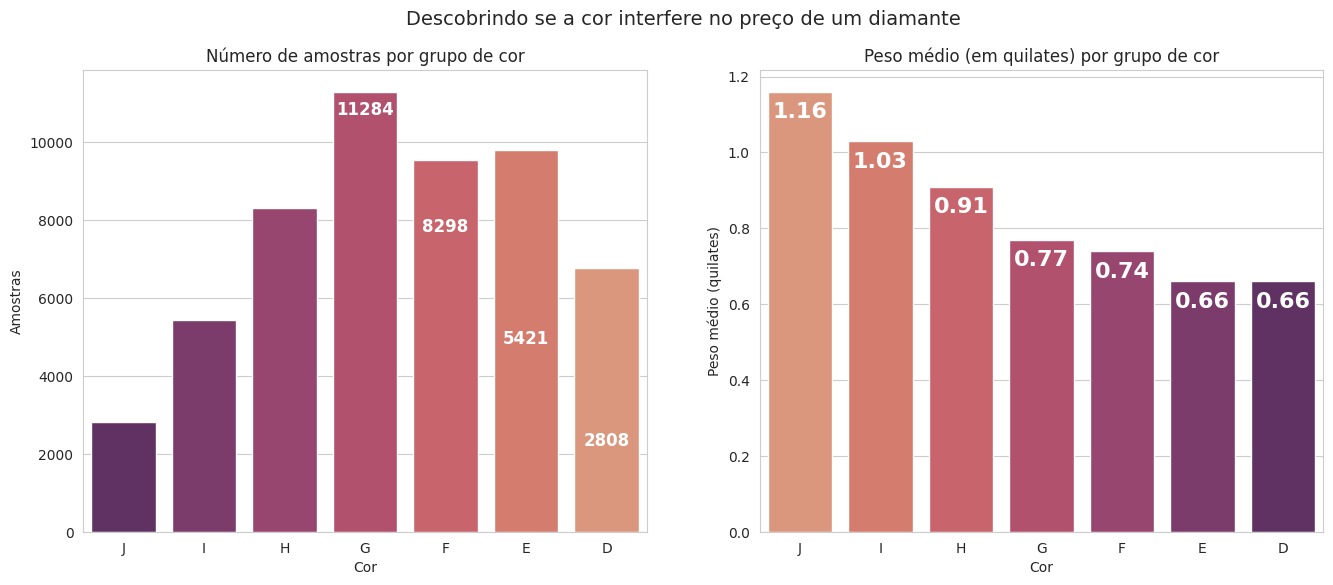

In [32]:
# Demonstração gráfica da informação nas tabelas acima:

# Montagem de uma grid com duas tabelas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Descobrindo se a cor interfere no preço de um diamante', fontsize = 14)

# Exibe um gráfico que mostra a quantia de amostras por grupos de cor
sns.barplot(data = color_summary, x = 'Cor', y = 'Amostras', ax = axes[0],
            hue = 'Cor', palette = 'flare', order = color_index)

# Cria texto em cada uma das barras com o valor exato de amostras
for index, row in color_summary.iterrows():
    axes[0].text(index, row['Amostras'] - 700, # posicionando dentro da barra
    row['Amostras'],
    color = 'white', ha = 'center', va = 'bottom',
    fontsize = 12, fontweight = 'bold')
axes[0].set_title('Número de amostras por grupo de cor')

# Exibe um gráfico que mostra o peso médio (em quilates) por grupos de cor
sns.barplot(data = avg_weight_by_color, x = 'Cor', y = 'Peso médio (quilates)', ax = axes[1],
            hue = 'Cor', palette = 'flare', order = color_index)

# Cria texto em cada uma das barras com o peso médio
for index, row in avg_weight_by_color.iterrows():
    axes[1].text(index, row['Peso médio (quilates)'] - 0.08, # posicionando dentro da barra
    row['Peso médio (quilates)'],
    color = 'white', ha = 'center', va = 'bottom',
    fontsize = 16, fontweight = 'bold')
axes[1].set_title('Peso médio (em quilates) por grupo de cor')

plt.show()

Agora que temos uma análise preliminar que nos dá quantos de cada tipo de cor existe no conjunto e seu peso médio em quilates, podemos entender, melhor, sua relação com o preço. Pra isso, fazemos o gráfico original, que compara a cor diretamente com o preço:

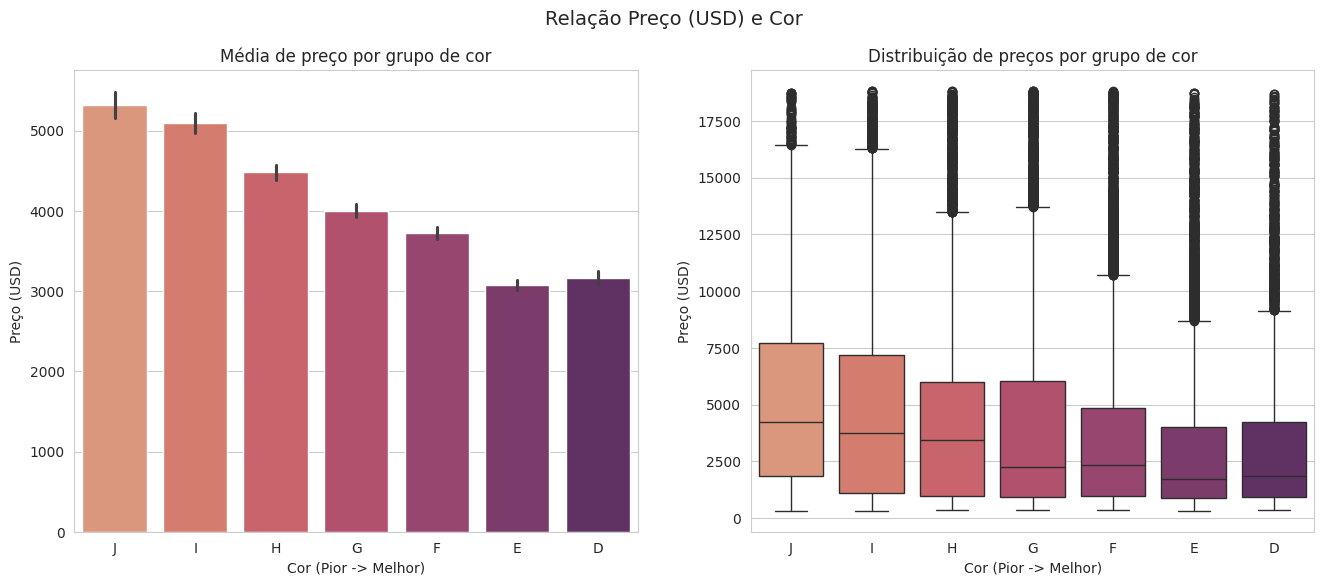

In [19]:
# Aqui, eu fiz dois gráficos similares aos primeiros 

# Cria uma grid para os dois gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Relação Preço (USD) e Cor', fontsize = 14)

# Exibe um gráfico de barras para a média de preço por grupo de cor
sns.barplot(x = 'color', y = 'price', data = df, ax = axes[0],
            hue = 'color', palette = 'flare', legend = False,
            order = color_index)
axes[0].set_title('Média de preço por grupo de cor')
axes[0].set_ylabel('Preço (USD)')
axes[0].set_xlabel('Cor (Pior -> Melhor)')

# Exibe um gráfico de caixas para indicar a distribuição de preços por grupo de cor
sns.boxplot(x = 'color', y = 'price', data = df, ax = axes[1],
            hue = 'color', palette = 'flare', legend = False,
            order = color_index)
axes[1].set_title('Distribuição de preços por grupo de cor')
axes[1].set_ylabel('Preço (USD)')
axes[1].set_xlabel('Cor (Pior -> Melhor)')

plt.show()

Como imaginado - a média de preço por cor é fortemente influenciada pelo peso do diamante, não muito diferente da clareza. A questão que sobra é como o preço das cores se comporta em uma situação uniforme - como, por exemplo, com diamantes de um peso específico. Mais uma vez, vamos usar os diamantes entre 0 e 1 quilates como exemplo:

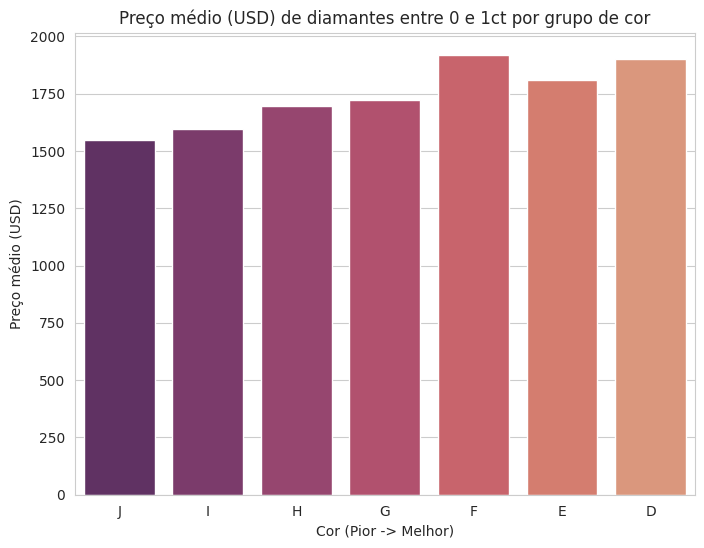

In [20]:
# Calcula o preço médio pra cada grupo de cor dentro desse filtro de peso:
avg_price_by_color_bin1 = diamonds_first_bin.groupby('color', observed = False)['price'].mean().reset_index()

# Agora cria o gráfico que mostra a nossa comparação:
plt.figure(figsize = (8, 6))
sns.barplot(data = avg_price_by_color_bin1, x = 'color', y = 'price',
            hue = 'color', palette = 'flare', order = color_index)
plt.title('Preço médio (USD) de diamantes entre 0 e 1ct por grupo de cor')
plt.xlabel('Cor (Pior -> Melhor)')
plt.ylabel('Preço médio (USD)')

plt.show()

Nessa situação - quando todos os diamantes testados são da mesma faixa de peso - é notável a diferença de preço de diamantes com cores mais foscas à diamantes com maior qualidade de cor. Ainda assim, é também deduzível que a cor, embora influencie no preço de um diamante, certamente não é o maior fator na atribuição do seu preço.

#### 4. O corte do diamante interfere no seu preço?
Qual a relação entre o corte de um diamante e sua precificação?

Não muito diferente das últimas duas, a comparação entre o preço médio dos diamantes e o tipo de corte envolve, também, a verificação do viés de peso, que vêm se provando ser forte o suficiente pra interferir profundamente no preço de forma independente de outras características.

Para saber se o mesmo acontece com o corte, passaremos pelo mesmo processo que já passamos: primeiro, faremos uma descoberta, revelando quantos diamantes de cada grupo de corte estão presentes no conjunto. Em seguida, mediremos o peso médio desses grupos, de forma a identificar qual grupo possui maior peso médio e, portanto, maior tendência a passar pelo viés de peso.

In [21]:
# Primeiro uma rápida descoberta: quais são os valores da variável,
# e quantas amostras cada um deles possui?

# Cria uma pequena tabela no pandas, contando o numero de valores em cada valor da variável corte
cut_summary = df.groupby('cut', observed = False).agg(
                             count = ('price', 'size'),
                             min_price = ('price', 'min'),
                             max_price = ('price', 'max')
                            ).reset_index()
cut_summary.columns = ['Corte', 'Amostras', 'Menor valor (USD)', 'Maior valor (USD)']

# Exibe a tabela
cut_summary

,Corte,Amostras,Menor valor (USD),Maior valor (USD)
0,Fair,1609,337,18574
1,Good,4902,327,18707
2,Ideal,21548,326,18806
3,Premium,13780,326,18823
4,Very Good,12081,336,18818


Para fins de organização de exibição em gráfico, vamos categorizar, também, os grupos de corte:

In [22]:
# Organizando os grupos de corte em ordem crescente de qualidade
cut_index = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

# Ordena categoricamente a variável de forma crescente
df['cut'] = pd.Categorical(df['cut'], categories = cut_index, ordered = True)

Voltando para a análise, é possível perceber acima que, novamente, possuímos uma variação de preço muito alta, mais uma vez indicando um possível viés de peso.

Prosseguimos, portanto, com a análise de peso médio por tipo de corte:

In [23]:
# Cria uma tabela Pandas para identificar o peso médio, em quilates, de cada grupo de corte
avg_weight_by_cut = df.groupby('cut', observed = False)['carat'].mean().round(2).reset_index()
avg_weight_by_cut.columns = ['Corte', 'Peso médio (quilates)']

# Exibe a tabela, mais uma vez
avg_weight_by_cut

,Corte,Peso médio (quilates)
0,Fair,1.05
1,Good,0.85
2,Very Good,0.81
3,Premium,0.89
4,Ideal,0.70


Analisando brevemente a média de peso por corte, podemos fazer duas suposições que serão, em breve, postas à prova:

Primeiro, confirmando o viés de peso, todos os grupos deverão ter preços relativamente próximos; com o grupo "Fair" tendo um preço médio levemente maior (menos amostras, maior peso médio, menor qualidade de corte) e o grupo "Ideal" tendo o menor preço da tabela (maior número de amostras, menor peso médio, maior qualidade de corte).

Vamos verificar as suposições criando uma tabela que compara preço e tipos de corte:

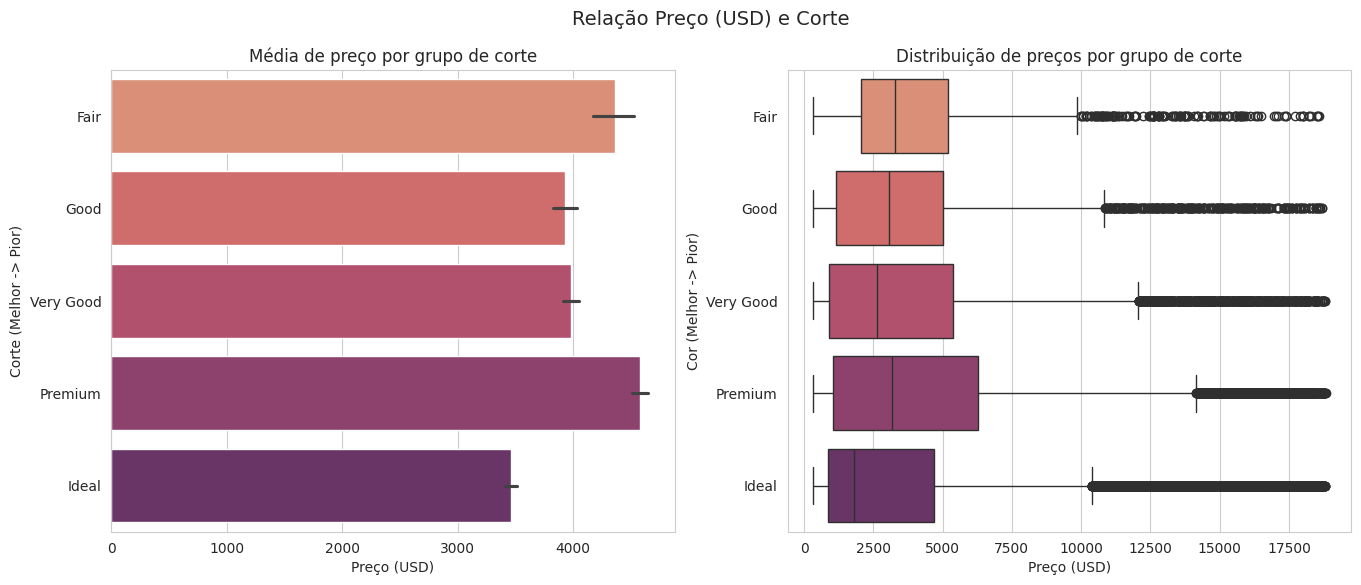

In [24]:
# Novamente repetindo o esquema de gráfico das últimas duas comparações:

# Cria uma grid para os dois gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Relação Preço (USD) e Corte', fontsize = 14)

# Exibe um gráfico de barras para a média de preço por grupo de corte
sns.barplot(x = 'price', y = 'cut', data = df, ax = axes[0],
            hue = 'cut', palette = 'flare', legend = False,
            order = cut_index, orient = 'h')
axes[0].set_title('Média de preço por grupo de corte')
axes[0].set_xlabel('Preço (USD)')
axes[0].set_ylabel('Corte (Melhor -> Pior)')

# Exibe um gráfico de caixas para indicar a distribuição de preços por grupo de corte
sns.boxplot(x = 'price', y = 'cut', data = df, ax = axes[1],
            hue = 'cut', palette = 'flare', legend = False,
            order = cut_index, orient = 'h')
axes[1].set_title('Distribuição de preços por grupo de corte')
axes[1].set_xlabel('Preço (USD)')
axes[1].set_ylabel('Cor (Melhor -> Pior)')

plt.show()

Parcialmente, as inferências sobre o viés de peso estavam corretas: de fato, embora a qualidade de corte "Ideal" seja a maior qualidade de corte, ela é a que tem o preço médio mais baixo. Isso é devido à sua amostra maior que as demais, tal como o peso médio inferior (existem mais diamantes "Ideal" no conjunto, e uma grande parte deles são mais leves que os demais). Ao mesmo tempo, a qualidade de corte "Fair", que é a pior qualidade de corte, é a que possui o preço mais alto; isso também é devido ao número de amostras (possui menos amostras no conjunto) e ao peso médio (>1ct, maior peso médio dentre os cortes), que interferem na avaliação.

Mais uma vez, um último teste envolvendo a comparação de preços dentre os grupos de corte usando apenas diamantes de um peso específico (0-1ct):

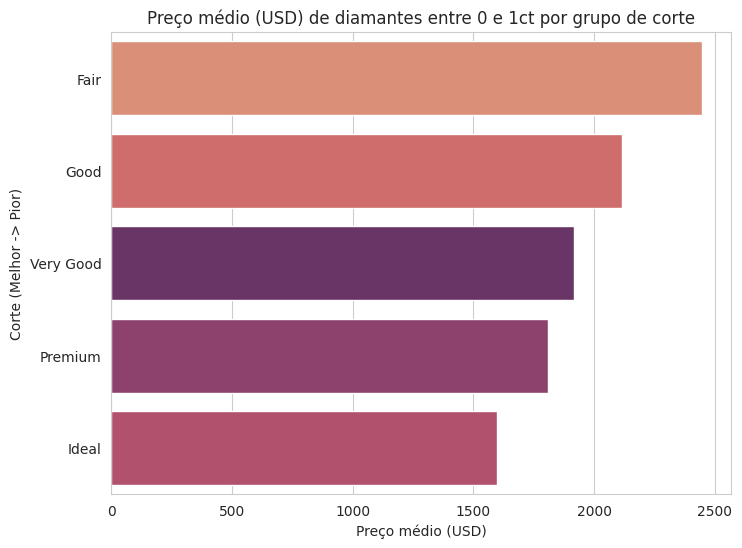

In [25]:
# Calcula o preço médio pra cada grupo de corte dentro desse filtro de peso:
avg_price_by_cut_bin1 = diamonds_first_bin.groupby('cut', observed = False)['price'].mean().reset_index()

# Agora cria o gráfico que mostra a nossa comparação:
plt.figure(figsize = (8, 6))
sns.barplot(data = avg_price_by_cut_bin1, x = 'price', y = 'cut',
            hue = 'cut', palette = 'flare',
            order = cut_index, orient = 'h')
plt.title('Preço médio (USD) de diamantes entre 0 e 1ct por grupo de corte')
plt.ylabel('Corte (Melhor -> Pior)')
plt.xlabel('Preço médio (USD)')

plt.show()

De maneira surpreendente, os diamantes com o pior tipo de corte possuem a maior média de preço entre os pesos de 0 a 1 quilates. Isso pode ser, novamente, causado pelo número de amostras no conjunto (são poucas amostras, menos de 2%), já que qualquer diamante com preço elevado seria o suficiente pra aumentar o preço médio. Isso poderia ser melhor conferido triangulando o preço médio dentro desse recorte e a quantia de diamantes presente em cada conjunto.

## 3. Insights

#### O peso de um diamante é o fator que mais influencia no seu peso.
Invariavelmente, diamantes têm seu valor diretamente relacionado ao seu paso. Fatores secundários, como cor, corte ou clareza, também influenciam no preço final da pedra, embora essa diferença seja apenas perceptível quando comparados diamantes de peso igual ou similar.

#### O volume de instâncias no dataset entre 0 e 2 quilates cria um viés.
O dataset possui, ao todo, 53920 instâncias trabalháveis. Dessas unidades, 52037 unidades são diamantes entre 0 e 2 quilates. Por conta disso, os preços de diamantes com mais de dois quilates podem estar enviesados pela falta de abundância de dados. Isso pode interferir, também, na precificação por outras características, como indicado no insight acima.